In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)


Python version: 3.10.12
Tensorflow version: 2.15.0


In [3]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [5]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [6]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


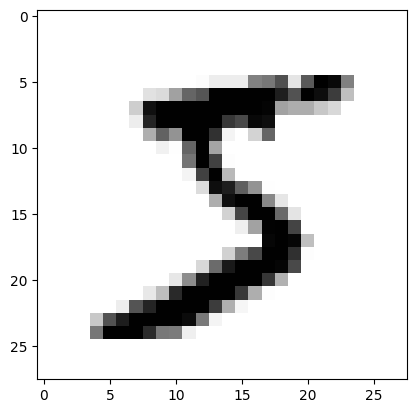

In [7]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

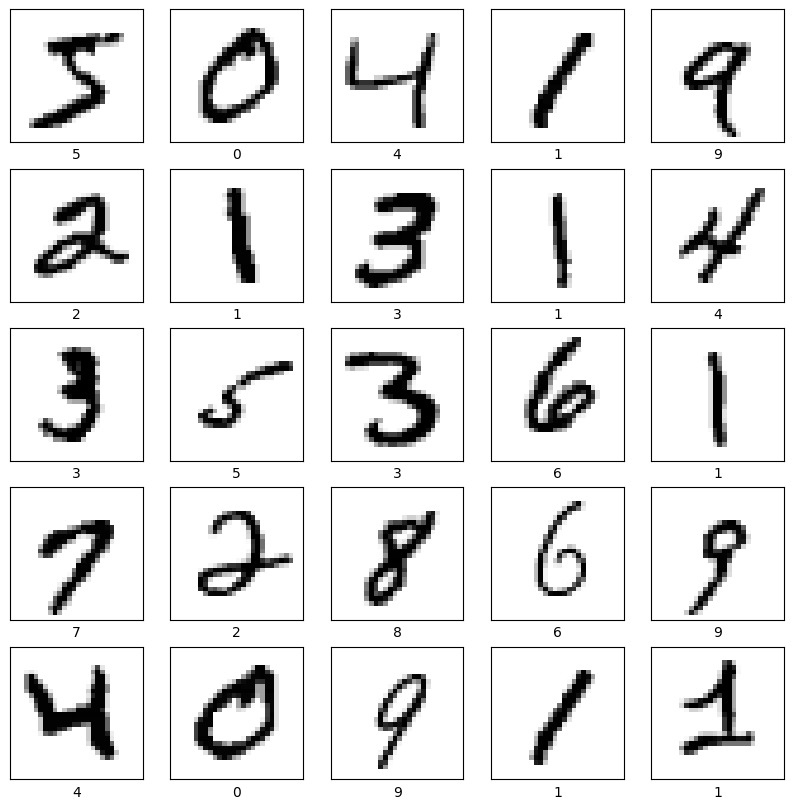

In [8]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [13]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [14]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


In [15]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [16]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [17]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [18]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.1927 - accuracy: 0.9426 - val_loss: 0.0534 - val_accuracy: 0.9830
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0693 - accuracy: 0.9786 - val_loss: 0.0383 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 0.0336 - val_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0357 - val_accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0339 - accuracy: 0.9892 - val_loss: 0.0314 - val_accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0387 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0292 -

In [19]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [20]:
loaded_model = tf.keras.models.load_model(model_name)

In [21]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 1s 4ms/step


In [22]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [23]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.791764e-14,5.419390e-15,4.727875e-12,5.388165e-13,6.620763e-12,1.084192e-12,3.977303e-22,9.999999e-01,1.113978e-14,4.602548e-10
1,2.408814e-09,4.153476e-09,9.999999e-01,3.534329e-15,7.200258e-12,1.059527e-16,5.974053e-12,2.335589e-12,1.107731e-12,3.039379e-13
2,3.561247e-09,9.999985e-01,2.480170e-08,8.084789e-13,1.110810e-07,2.019289e-08,4.422282e-07,6.658192e-07,1.744353e-07,9.265417e-10
3,9.999998e-01,1.491877e-16,1.305462e-12,3.523916e-11,1.303217e-13,2.522751e-11,4.413939e-08,3.864918e-14,1.338521e-10,1.457815e-07
4,1.198038e-12,2.830350e-11,1.050328e-14,1.044725e-15,9.999873e-01,1.142634e-10,3.800602e-12,3.096270e-11,1.715093e-11,1.260318e-05
...,...,...,...,...,...,...,...,...,...,...
9995,4.411247e-15,4.125677e-12,9.999999e-01,3.127448e-14,1.079518e-16,3.146672e-18,7.702297e-16,6.956874e-10,7.469916e-14,5.652929e-15
9996,6.431514e-12,4.179265e-09,4.050841e-11,9.999948e-01,3.600662e-10,5.120590e-06,4.191583e-13,6.713668e-10,5.605523e-10,3.076313e-08
9997,8.131437e-22,2.983970e-10,1.734566e-17,7.611037e-20,9.999999e-01,1.147897e-16,5.138500e-14,9.757309e-12,4.693888e-14,1.158514e-12
9998,1.488945e-14,8.706483e-19,2.508073e-20,5.447951e-12,5.005080e-17,9.999999e-01,5.171391e-13,1.099481e-20,5.812700e-09,6.739998e-12


In [25]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [26]:
print(predictions[0])

7


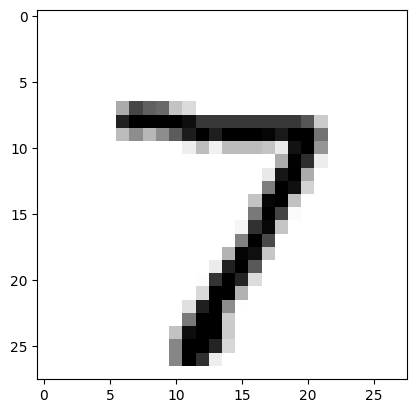

In [27]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()